In [1]:
import sys
sys.path.insert(0,'/eos/home-m/matheus/.local/lib/python3.8/site-packages/coffea')
print ( sys.path )

#from __future__ import division, print_function

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mplhep as hep
import h5py
from coffea import hist
import uproot4
import awkward1 as ak
import awkward
import uproot
import math
import coffea
print ( "coffea: {}".format(coffea.__version__) )

['/eos/home-m/matheus/.local/lib/python3.8/site-packages/coffea', '/cvmfs/sft.cern.ch/lcg/views/LCG_99/x86_64-centos7-gcc8-opt/python', '/cvmfs/sft.cern.ch/lcg/views/LCG_99/x86_64-centos7-gcc8-opt/lib', '', '/cvmfs/sft.cern.ch/lcg/views/LCG_99/x86_64-centos7-gcc8-opt/lib/python3.8/site-packages', '/cvmfs/sft.cern.ch/lcg/releases/Python/3.8.6-3199b/x86_64-centos7-gcc8-opt/lib/python38.zip', '/cvmfs/sft.cern.ch/lcg/releases/Python/3.8.6-3199b/x86_64-centos7-gcc8-opt/lib/python3.8', '/cvmfs/sft.cern.ch/lcg/releases/Python/3.8.6-3199b/x86_64-centos7-gcc8-opt/lib/python3.8/lib-dynload', '/eos/user/m/matheus/.local/lib/python3.8/site-packages', '/cvmfs/sft.cern.ch/lcg/releases/Python/3.8.6-3199b/x86_64-centos7-gcc8-opt/lib/python3.8/site-packages', '/cvmfs/sft.cern.ch/lcg/views/LCG_99/x86_64-centos7-gcc8-opt/lib/python3.8/site-packages/IPython/extensions', '/scratch/matheus/.ipython']
coffea: 0.7.2


In [2]:
def open_file_Data( file ):
    df = None
    with h5py.File( file , 'r' ) as f:
        dset = f[ 'dados' ]
        array = np.array( dset ) 
        array_cut = (array[:,0] > 600) & (array[:,1] >= 200) & (array[:,2] >= 2) & (array[:,3] >= 2) & (array[:,4] >= 200) & (array[:,5] <= 2.4) & (array[:,7] <=0.6) & (array[:,8] >= 40) & (array[:,9] >= 53)  & (array[:,10] <= 2.4)
        DataSet_ = array[array_cut]        
        dataframe = pd.DataFrame( DataSet_ , columns = ['Mww', 'Pt_W_lep', 'dPhi_Whad_Wlep', 'dPhi_jatos_MET', 'jetAK8_pt','jetAK8_eta', 'jetAK8_prunedMass',
'jetAK8_tau21', 'METPt', 'muon_pt', 'muon_eta', 'ExtraTracks', 'PUWeight', 'Yww', 'xi1', 'xi2','Mx', 'Yx', 
'Mww/Mx', 'Yww_Yx'] )
        dataframe['Acoplanaridade_Whad_Wlep'] = 1 - dataframe['dPhi_Whad_Wlep'].abs()/math.pi
        dataframe['Acoplanaridade_jatos_MET'] = 1 - dataframe['dPhi_jatos_MET'].abs()/math.pi
        return dataframe
    
def open_file_MC( file ):
    df = None
    with h5py.File( file , 'r' ) as f:
        dset = f[ 'dados' ]
        array = np.array( dset ) 
        array_cut = (array[:,0] > 600) & (array[:,1] >= 200) & (array[:,2] >= 2) & (array[:,3] >= 2) & (array[:,4] >= 200) & (array[:,5] <= 2.4) & (array[:,7] <=0.6) & (array[:,8] >= 40) & (array[:,9] >= 53)  & (array[:,10] <= 2.4)
        DataSet_ = array[array_cut]        
        dataframe = pd.DataFrame( DataSet_ , columns = ['Mww', 'Pt_W_lep', 'dPhi_Whad_Wlep', 'dPhi_jatos_MET', 'jetAK8_pt',
       'jetAK8_eta', 'jetAK8_prunedMass', 'jetAK8_tau21', 'METPt', 'muon_pt',
       'muon_eta', 'ExtraTracks', 'PUWeight', 'Yww', 'xi1', 'xi2', 'Mx', 'Yx',
       'Mww/Mx', 'Yww_Yx', 'weight'] )
        dataframe['Acoplanaridade_Whad_Wlep'] = 1 - dataframe['dPhi_Whad_Wlep'].abs()/math.pi
        dataframe['Acoplanaridade_jatos_MET'] = 1 - dataframe['dPhi_jatos_MET'].abs()/math.pi
        return dataframe 
    
def open_file_DD( file ):
    df = None
    with h5py.File( file , 'r' ) as f:
        dset = f[ 'dados' ]
        array = np.array( dset ) 
        array_cut = (array[:,0] > 600) & (array[:,1] >= 200) & (array[:,2] >= 2) & (array[:,3] >= 2) & (array[:,4] >= 200) & (array[:,5] <= 2.4) & (array[:,7] <=0.6) & (array[:,8] >= 40) & (array[:,9] >= 53)  & (array[:,10] <= 2.4)
        DataSet_ = array[array_cut]        
        dataframe = pd.DataFrame( DataSet_ , columns = ['Mww', 'Pt_W_lep', 'dPhi_Whad_Wlep', 'dPhi_jatos_MET', 'jetAK8_pt',
       'jetAK8_eta', 'jetAK8_prunedMass', 'jetAK8_tau21', 'METPt', 'muon_pt',
       'muon_eta', 'ExtraTracks', 'Yww', 'xi1', 'xi2', 
       'Mx', 'Yx', 'Mww/Mx', 'Yww_Yx', 'weight'] )
        dataframe['Acoplanaridade_Whad_Wlep'] = 1 - dataframe['dPhi_Whad_Wlep'].abs()/math.pi
        dataframe['Acoplanaridade_jatos_MET'] = 1 - dataframe['dPhi_jatos_MET'].abs()/math.pi
        return dataframe 

In [3]:
plt.style.use(hep.style.ROOT)

In [4]:
PATH = '/eos/home-m/matheus/SWAN_projects/Acoplamento_Quartico_Anomalo/'

In [5]:
DataFrame_DataDriven_Background = open_file_DD( PATH + 'DataDriven_Background_multiRP.h5')

In [6]:
DataFrame_DataDriven_Background

,Mww,Pt_W_lep,dPhi_Whad_Wlep,dPhi_jatos_MET,jetAK8_pt,jetAK8_eta,jetAK8_prunedMass,jetAK8_tau21,METPt,muon_pt,...,Yww,xi1,xi2,Mx,Yx,Mww/Mx,Yww_Yx,weight,Acoplanaridade_Whad_Wlep,Acoplanaridade_jatos_MET
0,956.729620,344.981106,2.988486,2.411655,526.427156,0.508421,171.405609,0.320342,91.846592,272.636658,...,0.207985,0.102238,0.042712,859.065180,-0.436410,1.113687,0.644395,0.01,0.048735,0.232346
1,1035.640370,332.416990,2.850746,2.667566,252.239694,1.895369,42.999844,0.318786,237.892549,107.614922,...,0.425159,0.072165,0.119142,1205.421636,0.250681,0.859152,0.174477,0.01,0.092579,0.150888
2,989.185238,362.536096,2.921376,3.032196,290.099964,1.115427,54.431099,0.463058,133.598671,230.231537,...,0.832925,0.093436,0.130470,1435.348042,0.166934,0.689161,0.665991,0.01,0.070097,0.034822
3,718.366723,354.693134,2.069933,2.178368,352.375276,0.965314,95.619637,0.585941,215.705012,142.184464,...,0.027878,0.071905,0.063134,875.900048,-0.065044,0.820147,0.092923,0.01,0.341120,0.306604
4,647.472556,214.047868,3.043731,2.783819,403.285868,0.884264,75.869972,0.434915,104.100857,116.555450,...,0.129396,0.090373,0.115534,1328.363061,0.122813,0.487421,0.006583,0.01,0.031150,0.113883
5,825.091676,252.846876,3.081540,2.927897,406.935105,0.657849,115.002182,0.284436,207.531321,57.356552,...,-1.913469,0.068269,0.134407,1245.278123,0.338711,0.662576,-2.252179,0.01,0.019115,0.068022
6,704.826565,257.109356,2.898038,2.902414,386.243704,1.628428,67.507591,0.514066,100.027198,157.083725,...,-0.700701,0.073023,0.114625,1189.356423,0.225449,0.592612,-0.926149,0.01,0.077526,0.076133
7,750.719064,364.473955,3.085842,3.103722,349.685784,0.107733,115.762733,0.430361,215.630304,148.928024,...,-0.250588,0.078944,0.115766,1242.780238,0.191418,0.604064,-0.442006,0.01,0.017746,0.012055
8,762.845103,348.461613,3.038029,2.851197,349.371300,1.055845,63.919239,0.393747,196.291533,159.801086,...,1.747117,0.081118,0.047767,809.221836,-0.264779,0.942690,2.011896,0.01,0.032965,0.092436
9,1328.146161,644.200809,3.112708,2.825960,637.948022,0.910285,160.527695,0.301090,134.612668,516.489746,...,0.591474,0.085347,0.096007,1176.765604,0.058845,1.128641,0.532629,0.01,0.009194,0.100469


In [7]:
SM =       open_file_MC( PATH + 'DataSet_SM_multiRP.h5')
ANOMALO1 = open_file_MC( PATH + 'DataSet_ANOMALO1_multiRP.h5')
ANOMALO2 = open_file_MC( PATH + 'DataSet_ANOMALO2_multiRP.h5')
ANOMALO3 = open_file_MC( PATH + 'DataSet_ANOMALO3_multiRP.h5')
ANOMALO4 = open_file_MC( PATH + 'DataSet_ANOMALO4_multiRP.h5')
ANOMALO5 = open_file_MC( PATH + 'DataSet_ANOMALO5_multiRP.h5')
ANOMALO6 = open_file_MC( PATH + 'DataSet_ANOMALO6_multiRP.h5')
ANOMALO7 = open_file_MC( PATH + 'DataSet_ANOMALO7_multiRP.h5')
ANOMALO8 = open_file_MC( PATH + 'DataSet_ANOMALO8_multiRP.h5')

In [8]:
SM.columns

Index(['Mww', 'Pt_W_lep', 'dPhi_Whad_Wlep', 'dPhi_jatos_MET', 'jetAK8_pt',
       'jetAK8_eta', 'jetAK8_prunedMass', 'jetAK8_tau21', 'METPt', 'muon_pt',
       'muon_eta', 'ExtraTracks', 'PUWeight', 'Yww', 'xi1', 'xi2', 'Mx', 'Yx',
       'Mww/Mx', 'Yww_Yx', 'weight', 'Acoplanaridade_Whad_Wlep',
       'Acoplanaridade_jatos_MET'],
      dtype='object')

In [9]:
DataFrame_multiRP_Drell_Yan = open_file_MC( PATH + 'DataSet_multiRP_DrellYan.h5' )
DataFrame_multiRP_QCD = open_file_MC( PATH + 'DataSet_multiRP_QCD.h5' )
DataFrame_multiRP_Single_Top = open_file_MC( PATH + 'DataSet_multiRP_single_top.h5' )
DataFrame_multiRP_TTbar = open_file_MC( PATH + 'DataSet_multiRP_TTbar.h5' )
DataFrame_multiRP_VV_inclusive = open_file_MC( PATH + 'DataSet_multiRP_VV_inclusivo.h5' )
DataFrame_multiRP_WJets = open_file_MC( PATH + 'DataSet_multiRP_WJets.h5' )

In [10]:
DataFrame_multiRP_back = open_file_MC( PATH + 'DataSet_back_multiRP.h5' )

In [11]:
DataFrame_Data = open_file_Data( PATH + 'DataSet_dados_multiRP.h5' )

In [12]:
label = [ r'WWCEP $\alpha_{C}^{W}/\Lambda^{2}=0.0$ (SM)', 
          r'WWCEP $\alpha_{C}^{W}/\Lambda^{2}=2 \times 10^{-5}$', 
          r'WWCEP $\alpha_{C}^{W}/\Lambda^{2}=2 \times 10^{-6}$', 
          r'WWCEP $\alpha_{0}^{W}/\Lambda^{2} = 2.0 \times 10^{-6} $',
          r'WWCEP $\alpha_{0}^{W}/\Lambda^{2} = 5.0 \times 10^{-6} $']
def lista_events_signal(var):
    return [ ANOMALO1[var] , ANOMALO2[var] , ANOMALO7[var] , ANOMALO8[var] ]
def lista_events_back( var ):
    return[ DataFrame_multiRP_TTbar[var], DataFrame_multiRP_WJets[var] , DataFrame_multiRP_QCD[var], DataFrame_multiRP_VV_inclusive[var], DataFrame_multiRP_Single_Top[var], DataFrame_multiRP_Drell_Yan[var] ]

In [13]:
weight_signal = [ ANOMALO1['weight'] *50, 
                  ANOMALO2['weight']  *50,
                  ANOMALO7['weight']  *50,
                  ANOMALO8['weight']  *50] 

weight_signal_Extratracks = [ ANOMALO1['weight'] * 8, 
                              ANOMALO2['weight']  *8,
                              ANOMALO7['weight'] *8,
                              ANOMALO8['weight']  *8,] 

In [14]:
label_signal = [ 
r'WWCEP $\alpha_{C}^{W}/\Lambda^{2}=2 \times 10^{-5}$',
r'WWCEP $\alpha_{C}^{W}/\Lambda^{2}=8 \times 10^{-6}$',
r'WWCEP $\alpha_{0}^{W}/\Lambda^{2} = 0.5 \times 10^{-6} $',
r'WWCEP $\alpha_{0}^{W}/\Lambda^{2} = 5.0 \times 10^{-6} $'
          ]


label_back = [ r'$t\bar{t}}$',  'W+Jatos','QCD', '(WW, WZ, ZZ) Inclusivo', 'Single-Top', 'Drell-Yan']
color = ['gold','green','red','cyan','fuchsia', 'lime']

(exptext: Custom Text(0.0, 1, 'CMS'),
 expsuffix: Custom Text(0.0, 1.005, 'Preliminary'))

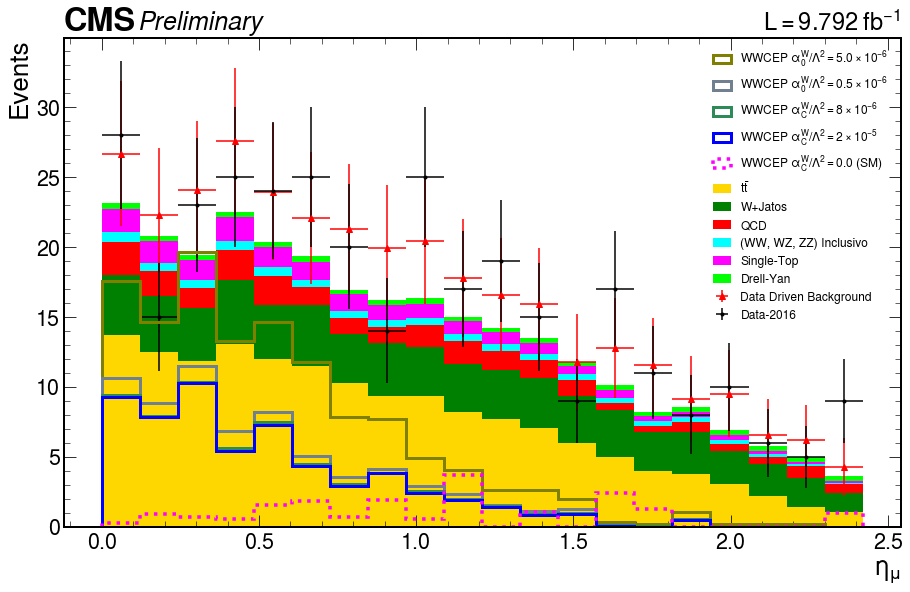

In [38]:
plt.figure(figsize=(15,9))

bins = 20
range_ = (0,2.42) 
var = 'muon_eta'
#plt.hist( DataFrame_DataDriven_Background[var], range = range_, color = 'blue', histtype = 'step' , linewidth=3, ls = '--', alpha = 1, bins = bins, weights = DataFrame_DataDriven_Background['weight'], label =  'DataDriven-Background' )

counts_1, bin_edges_1 = np.histogram( DataFrame_DataDriven_Background[var] , bins = bins, range = range_, weights = DataFrame_DataDriven_Background['weight'] )
errors_1 = np.sqrt( counts_1 )
bin_centres_1 = ( bin_edges_1[:-1] + bin_edges_1[1:] ) / 2.
plt.errorbar( bin_centres_1, counts_1, yerr=errors_1, xerr=abs(bin_centres_1[4] - bin_centres_1[5])/2,  fillstyle='full', fmt='^', label = 'Data Driven Background', color = 'red' )

#plt.hist(DataFrame_DataDriven_Background[var] , color = 'skyblue' ,bins = bins, range = range_, weights = DataFrame_DataDriven_Background['weight'], label = 'DataDriven Background')

plt.hist( lista_events_signal(var), linewidth=3, ls = '-', histtype = 'step', color = ['blue','seagreen','slategrey','olive'],range = range_, bins = bins, stacked=True, label = label_signal, weights = weight_signal )
plt.hist( SM[var], linewidth=3.5, ls = ':', histtype = 'step', color = 'fuchsia', range = range_, bins = bins, stacked=True, label = r'WWCEP $\alpha_{C}^{W}/\Lambda^{2}=0.0$ (SM)', weights = SM['weight']*1000 )

counts_2, bin_edges_2 = np.histogram( DataFrame_Data[var] , bins = bins, range = range_ )
errors_2 = np.sqrt( counts_2 )
bin_centres_2 = ( bin_edges_2[:-1] + bin_edges_2[1:] ) / 2.
plt.errorbar( bin_centres_2, counts_2, yerr=errors_2, xerr=abs(bin_centres_2[4] - bin_centres_2[5])/2, fmt='.', label = 'Data-2016', color = 'black' )

plt.hist( lista_events_back(var), stacked=True, bins = bins, range = range_, weights = [ DataFrame_multiRP_TTbar['weight'], DataFrame_multiRP_WJets['weight'], DataFrame_multiRP_QCD['weight'], DataFrame_multiRP_VV_inclusive['weight'], DataFrame_multiRP_Single_Top['weight'], DataFrame_multiRP_Drell_Yan['weight'] ] ,  linewidth=2., label = label_back , color = color )

plt.legend(loc='best', fontsize = 12)
plt.xlabel(r'$\eta_{\mu}$')
plt.ylabel('Events')
hep.cms.label(llabel="Preliminary", rlabel="$\mathcal{L} = 9.792\;fb^{-1}$", fontsize = 25 )

(exptext: Custom Text(0.0, 1, 'CMS'),
 expsuffix: Custom Text(0.0, 1.005, 'Preliminary'))

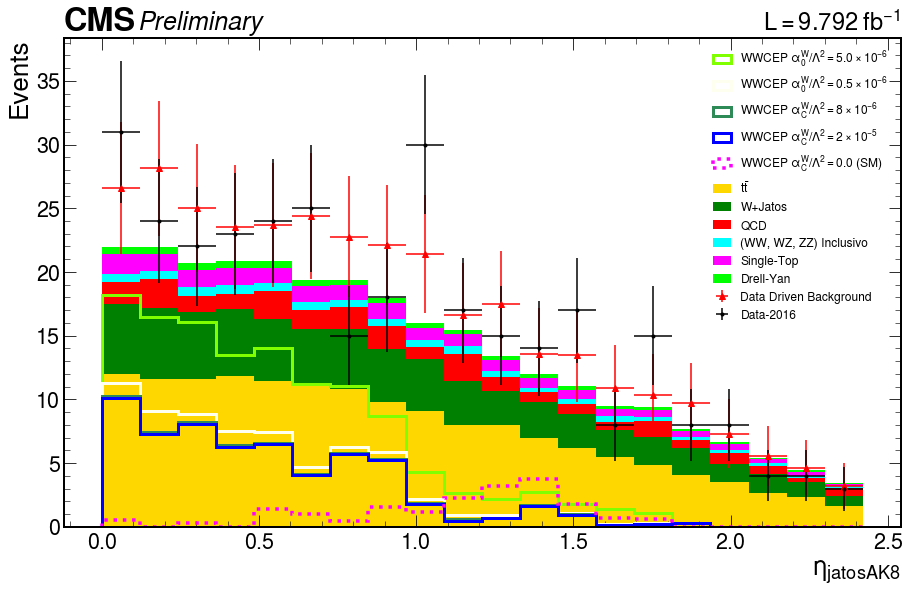

In [45]:
bins = 20
range_ = (0,2.42) 
plt.figure(figsize=(15,9))
var = 'jetAK8_eta'
#plt.hist( DataFrame_DataDriven_Background[var], range = range_, color = 'blue', histtype = 'step' , linewidth=3, ls = '--', alpha = 1, bins = bins, weights = DataFrame_DataDriven_Background['weight'], label =  'DataDriven-Background' )

counts_1, bin_edges_1 = np.histogram( DataFrame_DataDriven_Background[var] , bins = bins, range = range_, weights = DataFrame_DataDriven_Background['weight'] )
errors_1 = np.sqrt( counts_1 )
bin_centres_1 = ( bin_edges_1[:-1] + bin_edges_1[1:] ) / 2.
plt.errorbar( bin_centres_1, counts_1, yerr=errors_1, xerr=abs(bin_centres_1[4] - bin_centres_1[5])/2,  fillstyle='full', fmt='^', label = 'Data Driven Background', color = 'red' )

#plt.hist(DataFrame_DataDriven_Background[var] , color = 'skyblue' ,bins = bins, range = range_, weights = DataFrame_DataDriven_Background['weight'], label = 'DataDriven Background')

plt.hist( lista_events_signal(var), linewidth=3, ls = '-', histtype = 'step', color = ['blue','seagreen','ivory','chartreuse'],range = range_, bins = bins, stacked=True, label = label_signal, weights = weight_signal )
plt.hist( SM[var], linewidth=3.5, ls = ':', histtype = 'step', color = 'fuchsia', range = range_, bins = bins, stacked=True, label = r'WWCEP $\alpha_{C}^{W}/\Lambda^{2}=0.0$ (SM)', weights = SM['weight']*1000 )

counts_2, bin_edges_2 = np.histogram( DataFrame_Data[var] , bins = bins, range = range_ )
errors_2 = np.sqrt( counts_2 )
bin_centres_2 = ( bin_edges_2[:-1] + bin_edges_2[1:] ) / 2.
plt.errorbar( bin_centres_2, counts_2, yerr=errors_2, xerr=abs(bin_centres_2[4] - bin_centres_2[5])/2, fmt='.', label = 'Data-2016', color = 'black' )

plt.hist( lista_events_back(var), stacked=True, bins = bins, range = range_, weights = [ DataFrame_multiRP_TTbar['weight'], DataFrame_multiRP_WJets['weight'], DataFrame_multiRP_QCD['weight'], DataFrame_multiRP_VV_inclusive['weight'], DataFrame_multiRP_Single_Top['weight'], DataFrame_multiRP_Drell_Yan['weight'] ] ,  linewidth=2., label = label_back , color = color )

plt.legend(loc='best', fontsize = 12)
plt.xlabel(r'$\eta_{jatos AK8}$')
plt.ylabel('Events')
hep.cms.label(llabel="Preliminary", rlabel="$\mathcal{L} = 9.792\;fb^{-1}$", fontsize = 25)

(exptext: Custom Text(0.0, 1, 'CMS'),
 expsuffix: Custom Text(0.0, 1.005, 'Preliminary'))

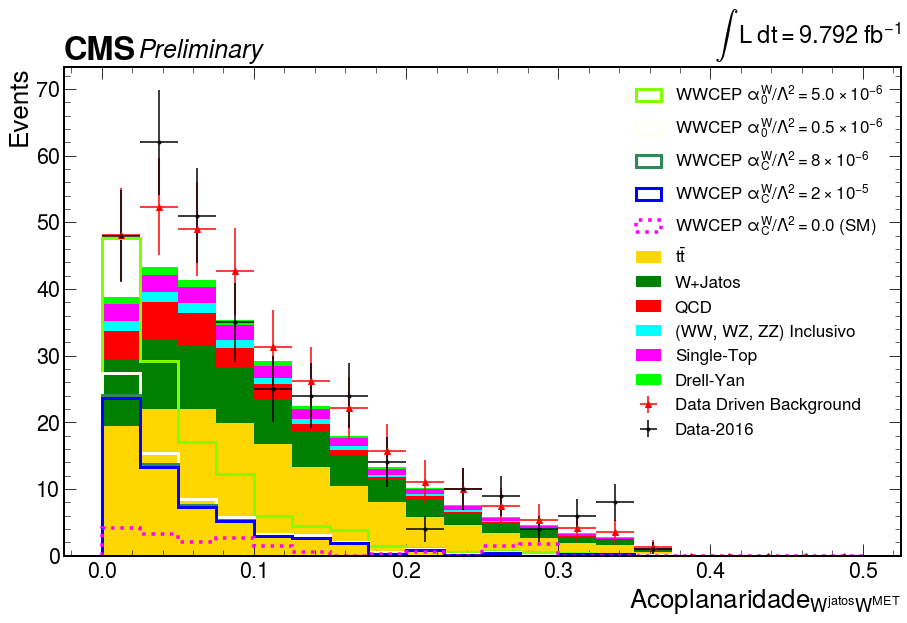

In [48]:
bins = 20
range_ = (0,0.5) 
plt.figure(figsize=(15,9))
var = 'Acoplanaridade_jatos_MET'
#plt.hist( DataFrame_DataDriven_Background[var], range = range_, color = 'blue', histtype = 'step' , linewidth=3, ls = '--', alpha = 1, bins = bins, weights = DataFrame_DataDriven_Background['weight'], label =  'DataDriven-Background' )
 
counts_1, bin_edges_1 = np.histogram( DataFrame_DataDriven_Background[var] , bins = bins, range = range_, weights = DataFrame_DataDriven_Background['weight'] )
errors_1 = np.sqrt( counts_1 )
bin_centres_1 = ( bin_edges_1[:-1] + bin_edges_1[1:] ) / 2.
plt.errorbar( bin_centres_1, counts_1, yerr=errors_1, xerr=abs(bin_centres_1[4] - bin_centres_1[5])/2,  fillstyle='full', fmt='^', label = 'Data Driven Background', color = 'red' )

#plt.hist(DataFrame_DataDriven_Background[var] , color = 'skyblue' ,bins = bins, range = range_, weights = DataFrame_DataDriven_Background['weight'], label = 'DataDriven Background')

plt.hist( lista_events_signal(var), linewidth=3, ls = '-', histtype = 'step', color = ['blue','seagreen','ivory','chartreuse'],range = range_, bins = bins, stacked=True, label = label_signal, weights = weight_signal )
plt.hist( SM[var], linewidth=3.5, ls = ':', histtype = 'step', color = 'fuchsia', range = range_, bins = bins, stacked=True, label = r'WWCEP $\alpha_{C}^{W}/\Lambda^{2}=0.0$ (SM)', weights = SM['weight']*1000 )

counts_2, bin_edges_2 = np.histogram( DataFrame_Data[var] , bins = bins, range = range_ )
errors_2 = np.sqrt( counts_2 )
bin_centres_2 = ( bin_edges_2[:-1] + bin_edges_2[1:] ) / 2.
plt.errorbar( bin_centres_2, counts_2, yerr=errors_2, xerr=abs(bin_centres_2[4] - bin_centres_2[5])/2, fmt='.', label = 'Data-2016', color = 'black' )

plt.hist( lista_events_back(var), stacked=True, bins = bins, range = range_, weights = [ DataFrame_multiRP_TTbar['weight'], DataFrame_multiRP_WJets['weight'], DataFrame_multiRP_QCD['weight'], DataFrame_multiRP_VV_inclusive['weight'], DataFrame_multiRP_Single_Top['weight'], DataFrame_multiRP_Drell_Yan['weight'] ] ,  linewidth=2., label = label_back , color = color )

plt.legend(loc='best', fontsize = 17)
plt.xlabel(r'$Acoplanaridade_{W^{jatos}W^{MET}}$')
plt.ylabel('Events')
hep.cms.label(llabel="Preliminary", rlabel="$\int\;\;\mathcal{L}\;dt = 9.792\;fb^{-1}$", fontsize = 25)

(exptext: Custom Text(0.0, 1, 'CMS'),
 expsuffix: Custom Text(0.0, 1.005, 'Preliminary'))

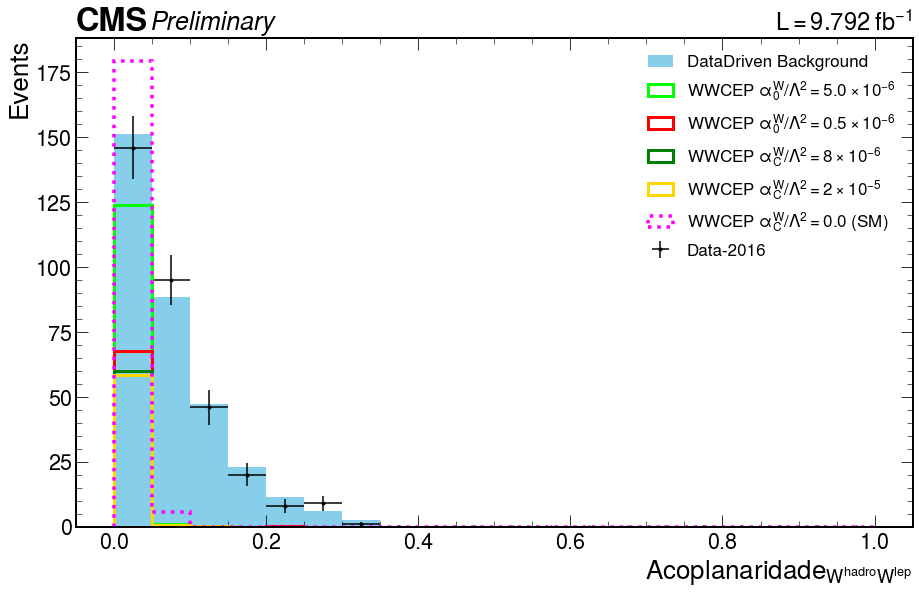

In [18]:
bins = 20
range_ = (0,0.4) 
plt.figure(figsize=(15,9))
var = 'Acoplanaridade_Whad_Wlep'
#plt.hist( DataFrame_DataDriven_Background[var], range = range_, color = 'blue', histtype = 'step' , linewidth=3, ls = '--', alpha = 1, bins = bins, weights = DataFrame_DataDriven_Background['weight'], label =  'DataDriven-Background' )

counts_1, bin_edges_1 = np.histogram( DataFrame_DataDriven_Background[var] , bins = bins, range = range_, weights = DataFrame_DataDriven_Background['weight'] )
errors_1 = np.sqrt( counts_1 )
bin_centres_1 = ( bin_edges_1[:-1] + bin_edges_1[1:] ) / 2.
#plt.errorbar( bin_centres_1, counts_1, yerr=errors_1, xerr=abs(bin_centres_1[4] - bin_centres_1[5])/2,  fillstyle='full', fmt='^', label = 'Data Driven Background', color = 'red' )

plt.hist(DataFrame_DataDriven_Background[var] , color = 'skyblue' ,bins = bins, range = range_, weights = DataFrame_DataDriven_Background['weight'], label = 'DataDriven Background')

plt.hist( lista_events_signal(var), linewidth=3, ls = '-', histtype = 'step', color = ['blue','seagreen','ivory','chartreuse'],range = range_, bins = bins, stacked=True, label = label_signal, weights = weight_signal )
plt.hist( SM[var], linewidth=3.5, ls = ':', histtype = 'step', color = 'fuchsia', range = range_, bins = bins, stacked=True, label = r'WWCEP $\alpha_{C}^{W}/\Lambda^{2}=0.0$ (SM)', weights = SM['weight']*10000 )

counts_2, bin_edges_2 = np.histogram( DataFrame_Data[var] , bins = bins, range = range_ )
errors_2 = np.sqrt( counts_2 )
bin_centres_2 = ( bin_edges_2[:-1] + bin_edges_2[1:] ) / 2.
plt.errorbar( bin_centres_2, counts_2, yerr=errors_2, xerr=abs(bin_centres_2[4] - bin_centres_2[5])/2, fmt='.', label = 'Data-2016', color = 'black' )

#plt.hist( lista_events_back(var), stacked=True, bins = bins, range = range_, weights = [ DataFrame_multiRP_TTbar['weight'], DataFrame_multiRP_WJets['weight'], DataFrame_multiRP_QCD['weight'], DataFrame_multiRP_VV_inclusive['weight'], DataFrame_multiRP_Single_Top['weight'], DataFrame_multiRP_Drell_Yan['weight'] ] ,  linewidth=2., label = label_back , color = color )

plt.legend(loc='best', fontsize = 17)
plt.xlabel(r'$Acoplanaridade_{W^{hadro}W^{lep}}$')
plt.ylabel('Events')
hep.cms.label(llabel="Preliminary", rlabel="$\mathcal{L} = 9.792\;fb^{-1}$", fontsize = 25)

(exptext: Custom Text(0.0, 1, 'CMS'),
 expsuffix: Custom Text(0.0, 1.005, 'Preliminary'))

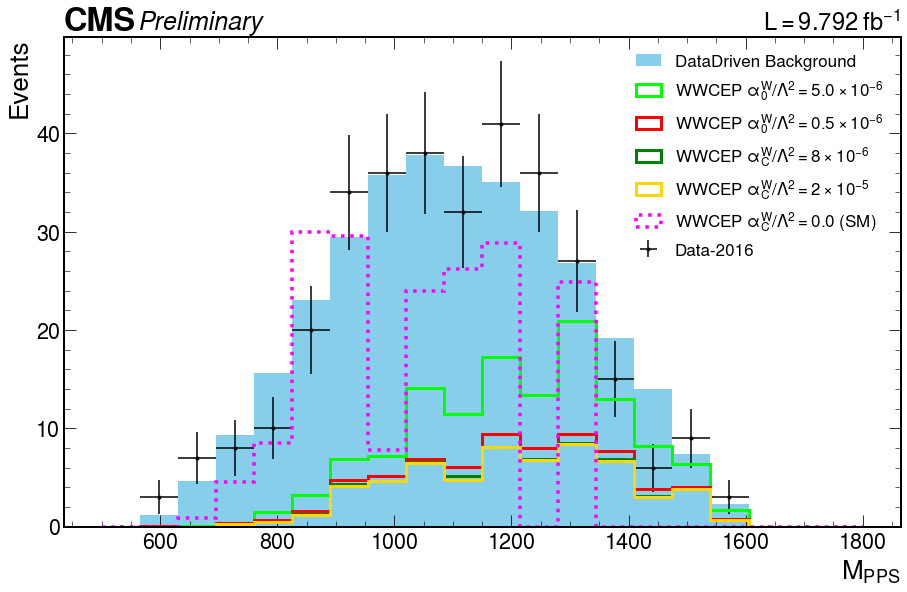

In [19]:
bins = 20
range_ = (500,1800) 
plt.figure(figsize=(15,9))
var = 'Mx'
#plt.hist( DataFrame_DataDriven_Background[var], range = range_, color = 'blue', histtype = 'step' , linewidth=3, ls = '--', alpha = 1, bins = bins, weights = DataFrame_DataDriven_Background['weight'], label =  'DataDriven-Background' )

counts_1, bin_edges_1 = np.histogram( DataFrame_DataDriven_Background[var] , bins = bins, range = range_, weights = DataFrame_DataDriven_Background['weight'] )
errors_1 = np.sqrt( counts_1 )
bin_centres_1 = ( bin_edges_1[:-1] + bin_edges_1[1:] ) / 2.
#plt.errorbar( bin_centres_1, counts_1, yerr=errors_1, xerr=abs(bin_centres_1[4] - bin_centres_1[5])/2,  fillstyle='full', fmt='^', label = 'Data Driven Background', color = 'red' )

plt.hist(DataFrame_DataDriven_Background[var] , color = 'skyblue' ,bins = bins, range = range_, weights = DataFrame_DataDriven_Background['weight'], label = 'DataDriven Background' )

plt.hist( lista_events_signal(var), linewidth=3, ls = '-', histtype = 'step', color = ['gold','green','red','lime'],range = range_, bins = bins, stacked=True, label = label_signal, weights = weight_signal )
plt.hist( SM[var], linewidth=3.5, ls = ':', histtype = 'step', color = 'fuchsia', range = range_, bins = bins, stacked=True, label = r'WWCEP $\alpha_{C}^{W}/\Lambda^{2}=0.0$ (SM)', weights = SM['weight']*10000 )

counts_2, bin_edges_2 = np.histogram( DataFrame_Data[var] , bins = bins, range = range_ )
errors_2 = np.sqrt( counts_2 )
bin_centres_2 = ( bin_edges_2[:-1] + bin_edges_2[1:] ) / 2.
plt.errorbar( bin_centres_2, counts_2, yerr=errors_2, xerr=abs(bin_centres_2[4] - bin_centres_2[5])/2, fmt='.', label = 'Data-2016', color = 'black' )

#plt.hist( lista_events_back(var), stacked=True, bins = bins, range = range_, weights = [ DataFrame_multiRP_TTbar['weight'], DataFrame_multiRP_WJets['weight'], DataFrame_multiRP_QCD['weight'], DataFrame_multiRP_VV_inclusive['weight'], DataFrame_multiRP_Single_Top['weight'], DataFrame_multiRP_Drell_Yan['weight'] ] ,  linewidth=2., label = label_back , color = color )

plt.legend(loc='best', fontsize = 17)
plt.xlabel(r'$M_{PPS}$')
plt.ylabel('Events')
hep.cms.label(llabel="Preliminary", rlabel="$\mathcal{L} = 9.792\;fb^{-1}$", fontsize = 25)

(exptext: Custom Text(0.0, 1, 'CMS'),
 expsuffix: Custom Text(0.0, 1.005, 'Preliminary'))

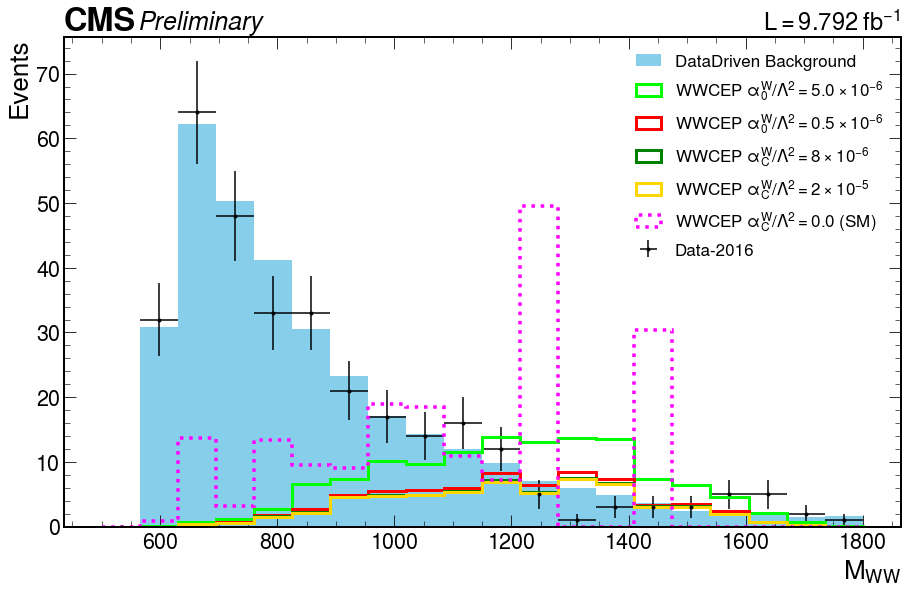

In [20]:
bins = 20
range_ = (500,1800) 
plt.figure(figsize=(15,9))
var = 'Mww'
#plt.hist( DataFrame_DataDriven_Background[var], range = range_, color = 'blue', histtype = 'step' , linewidth=3, ls = '--', alpha = 1, bins = bins, weights = DataFrame_DataDriven_Background['weight'], label =  'DataDriven-Background' )

counts_1, bin_edges_1 = np.histogram( DataFrame_DataDriven_Background[var] , bins = bins, range = range_, weights = DataFrame_DataDriven_Background['weight'] )
errors_1 = np.sqrt( counts_1 )
bin_centres_1 = ( bin_edges_1[:-1] + bin_edges_1[1:] ) / 2.
#plt.errorbar( bin_centres_1, counts_1, yerr=errors_1, xerr=abs(bin_centres_1[4] - bin_centres_1[5])/2,  fillstyle='full', fmt='^', label = 'Data Driven Background', color = 'red' )

plt.hist(DataFrame_DataDriven_Background[var] , color = 'skyblue' ,bins = bins, range = range_, weights = DataFrame_DataDriven_Background['weight'], label = 'DataDriven Background')


plt.hist( lista_events_signal(var), linewidth=3, ls = '-', histtype = 'step', color = ['gold','green','red','lime'],range = range_, bins = bins, stacked=True, label = label_signal, weights = weight_signal )
plt.hist( SM[var], linewidth=3.5, ls = ':', histtype = 'step', color = 'fuchsia', range = range_, bins = bins, stacked=True, label = r'WWCEP $\alpha_{C}^{W}/\Lambda^{2}=0.0$ (SM)', weights = SM['weight']*10000 )
counts_2, bin_edges_2 = np.histogram( DataFrame_Data[var] , bins = bins, range = range_ )
errors_2 = np.sqrt( counts_2 )
bin_centres_2 = ( bin_edges_2[:-1] + bin_edges_2[1:] ) / 2.
plt.errorbar( bin_centres_2, counts_2, yerr=errors_2, xerr=abs(bin_centres_2[4] - bin_centres_2[5])/2, fmt='.', label = 'Data-2016', color = 'black' )

#plt.hist( lista_events_back(var), stacked=True, bins = bins, range = range_, weights = [ DataFrame_multiRP_TTbar['weight'], DataFrame_multiRP_WJets['weight'], DataFrame_multiRP_QCD['weight'], DataFrame_multiRP_VV_inclusive['weight'], DataFrame_multiRP_Single_Top['weight'], DataFrame_multiRP_Drell_Yan['weight'] ] ,  linewidth=2., label = label_back , color = color )

plt.legend(loc='best', fontsize = 17)
plt.xlabel(r'$M_{WW}$')
plt.ylabel('Events')
hep.cms.label(llabel="Preliminary", rlabel="$\mathcal{L} = 9.792\;fb^{-1}$", fontsize = 25)

(exptext: Custom Text(0.0, 1, 'CMS'),
 expsuffix: Custom Text(0.0, 1.005, 'Preliminary'))

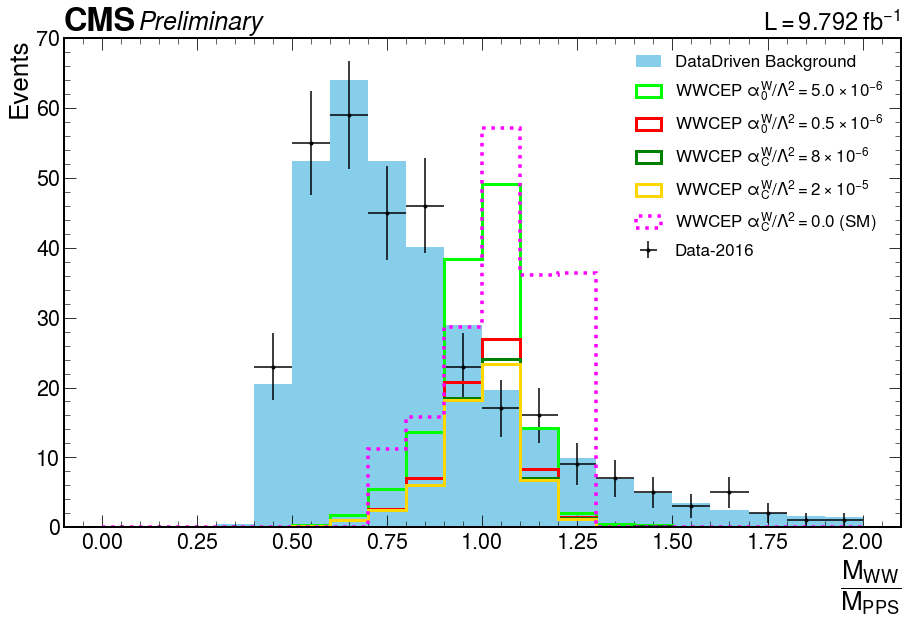

In [21]:
bins = 20
range_ = (0,2) 
plt.figure(figsize=(15,9))
var = 'Mww/Mx'
#plt.hist( DataFrame_DataDriven_Background[var], range = range_, color = 'blue', histtype = 'step' , linewidth=3, ls = '--', alpha = 1, bins = bins, weights = DataFrame_DataDriven_Background['weight'], label =  'DataDriven-Background' )

counts_1, bin_edges_1 = np.histogram( DataFrame_DataDriven_Background[var] , bins = bins, range = range_, weights = DataFrame_DataDriven_Background['weight'] )
errors_1 = np.sqrt( counts_1 )
bin_centres_1 = ( bin_edges_1[:-1] + bin_edges_1[1:] ) / 2.
#plt.errorbar( bin_centres_1, counts_1, yerr=errors_1, xerr=abs(bin_centres_1[4] - bin_centres_1[5])/2,  fillstyle='full', fmt='^', label = 'Data Driven Background', color = 'red' )

plt.hist(DataFrame_DataDriven_Background[var] , color = 'skyblue' ,bins = bins, range = range_, weights = DataFrame_DataDriven_Background['weight'], label = 'DataDriven Background')

plt.hist( lista_events_signal(var), linewidth=3, ls = '-', histtype = 'step', color = ['gold','green','red','lime'],range = range_, bins = bins, stacked=True, label = label_signal, weights = weight_signal )
plt.hist( SM[var], linewidth=3.5, ls = ':', histtype = 'step', color = 'fuchsia', range = range_, bins = bins, stacked=True, label = r'WWCEP $\alpha_{C}^{W}/\Lambda^{2}=0.0$ (SM)', weights = SM['weight']*10000 )

counts_2, bin_edges_2 = np.histogram( DataFrame_Data[var] , bins = bins, range = range_ )
errors_2 = np.sqrt( counts_2 )
bin_centres_2 = ( bin_edges_2[:-1] + bin_edges_2[1:] ) / 2.
plt.errorbar( bin_centres_2, counts_2, yerr=errors_2, xerr=abs(bin_centres_2[4] - bin_centres_2[5])/2, fmt='.', label = 'Data-2016', color = 'black' )

#plt.hist( lista_events_back(var), stacked=True, bins = bins, range = range_, weights = [ DataFrame_multiRP_TTbar['weight'], DataFrame_multiRP_WJets['weight'], DataFrame_multiRP_QCD['weight'], DataFrame_multiRP_VV_inclusive['weight'], DataFrame_multiRP_Single_Top['weight'], DataFrame_multiRP_Drell_Yan['weight'] ] ,  linewidth=2., label = label_back , color = color )

plt.legend(loc='best', fontsize = 17)
plt.xlabel(r'$\dfrac{M_{WW}}{M_{PPS}}$')
plt.ylabel('Events')
hep.cms.label(llabel="Preliminary", rlabel="$\mathcal{L} = 9.792\;fb^{-1}$", fontsize = 25)

(exptext: Custom Text(0.0, 1, 'CMS'),
 expsuffix: Custom Text(0.0, 1.005, 'Preliminary'))

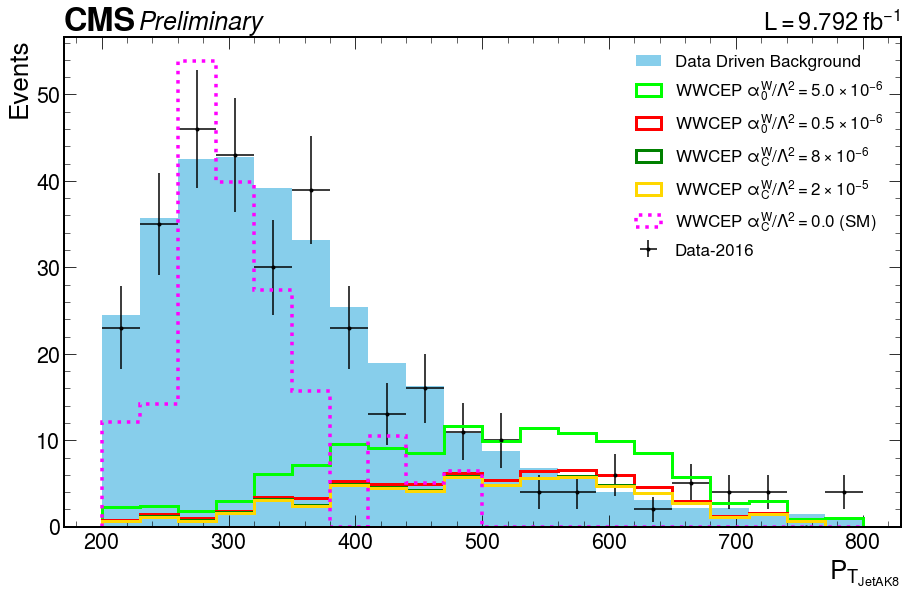

In [22]:
bins = 20
range_ = (200,800) 
plt.figure(figsize=(15,9))
var = 'jetAK8_pt'
#plt.hist( DataFrame_DataDriven_Background[var], range = range_, color = 'blue', histtype = 'step' , linewidth=3, ls = '--', alpha = 1, bins = bins, weights = DataFrame_DataDriven_Background['weight'], label =  'DataDriven-Background' )

counts_1, bin_edges_1 = np.histogram( DataFrame_DataDriven_Background[var] , bins = bins, range = range_, weights = DataFrame_DataDriven_Background['weight'] )
errors_1 = np.sqrt( counts_1 )
bin_centres_1 = ( bin_edges_1[:-1] + bin_edges_1[1:] ) / 2.
#plt.errorbar( bin_centres_1, counts_1, yerr=errors_1, xerr=abs(bin_centres_1[4] - bin_centres_1[5])/2,  fillstyle='full', fmt='^', label = 'Data Driven Background', color = 'red' )

plt.hist(DataFrame_DataDriven_Background[var] , color = 'skyblue' ,bins = bins, range = range_, weights = DataFrame_DataDriven_Background['weight'], label = 'Data Driven Background')

plt.hist( lista_events_signal(var), linewidth=3, ls = '-', histtype = 'step', color = ['gold','green','red','lime'],range = range_, bins = bins, stacked=True, label = label_signal, weights = weight_signal )
plt.hist( SM[var], linewidth=3.5, ls = ':', histtype = 'step', color = 'fuchsia', range = range_, bins = bins, stacked=True, label = r'WWCEP $\alpha_{C}^{W}/\Lambda^{2}=0.0$ (SM)', weights = SM['weight']*10000 )

counts_2, bin_edges_2 = np.histogram( DataFrame_Data[var] , bins = bins, range = range_ )
errors_2 = np.sqrt( counts_2 )
bin_centres_2 = ( bin_edges_2[:-1] + bin_edges_2[1:] ) / 2.
plt.errorbar( bin_centres_2, counts_2, yerr=errors_2, xerr=abs(bin_centres_2[4] - bin_centres_2[5])/2, fmt='.', label = 'Data-2016', color = 'black' )

#plt.hist( lista_events_back(var), stacked=True, bins = bins, range = range_, weights = [ DataFrame_multiRP_TTbar['weight'], DataFrame_multiRP_WJets['weight'], DataFrame_multiRP_QCD['weight'], DataFrame_multiRP_VV_inclusive['weight'], DataFrame_multiRP_Single_Top['weight'], DataFrame_multiRP_Drell_Yan['weight'] ] ,  linewidth=2., label = label_back , color = color )

plt.legend(loc='best', fontsize = 17)
plt.xlabel(r'$P_{T_{JetAK8}}$')
plt.ylabel('Events')
hep.cms.label(llabel="Preliminary", rlabel="$\mathcal{L} = 9.792\;fb^{-1}$", fontsize = 25)

(exptext: Custom Text(0.0, 1, 'CMS'),
 expsuffix: Custom Text(0.0, 1.005, 'Preliminary'))

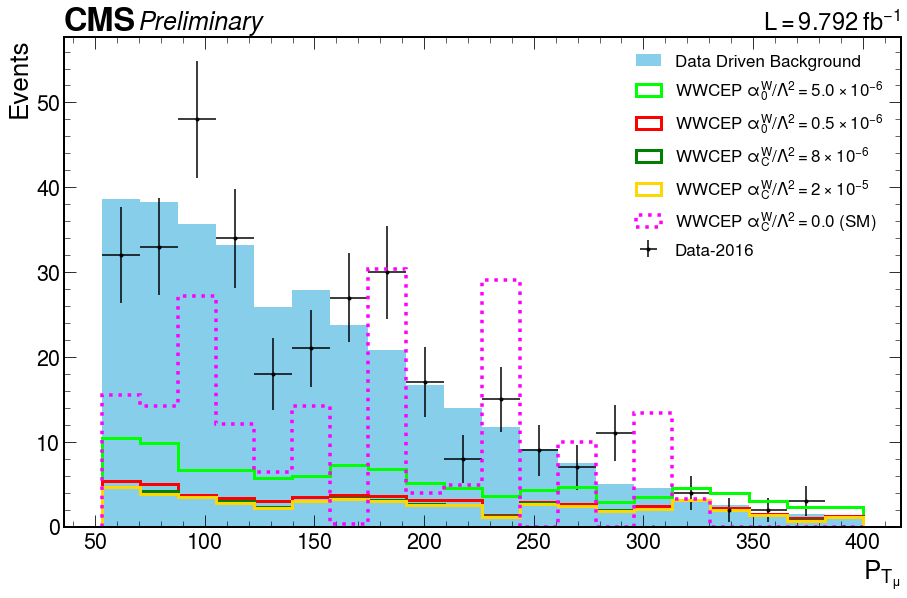

In [23]:
bins = 20
range_ = (53,400) 
plt.figure(figsize=(15,9))
var = 'muon_pt'
plt.hist(DataFrame_DataDriven_Background[var] , color = 'skyblue' ,bins = bins, range = range_, weights = DataFrame_DataDriven_Background['weight'], label = 'Data Driven Background')

counts_1, bin_edges_1 = np.histogram( DataFrame_DataDriven_Background[var] , bins = bins, range = range_, weights = DataFrame_DataDriven_Background['weight'] )
errors_1 = np.sqrt( counts_1 )
bin_centres_1 = ( bin_edges_1[:-1] + bin_edges_1[1:] ) / 2.
#plt.errorbar( bin_centres_1, counts_1, yerr=errors_1, xerr=abs(bin_centres_1[4] - bin_centres_1[5])/2,  fillstyle='full', fmt='^', label = 'Data Driven Background', color = 'red' )

plt.hist( lista_events_signal(var), linewidth=3, ls = '-', histtype = 'step', color = ['gold','green','red','lime'],range = range_, bins = bins, stacked=True, label = label_signal, weights = weight_signal )
plt.hist( SM[var], linewidth=3.5, ls = ':', histtype = 'step', color = 'fuchsia', range = range_, bins = bins, stacked=True, label = r'WWCEP $\alpha_{C}^{W}/\Lambda^{2}=0.0$ (SM)', weights = SM['weight']*10000 )

counts_2, bin_edges_2 = np.histogram( DataFrame_Data[var] , bins = bins, range = range_ )
errors_2 = np.sqrt( counts_2 )
bin_centres_2 = ( bin_edges_2[:-1] + bin_edges_2[1:] ) / 2.
plt.errorbar( bin_centres_2, counts_2, yerr=errors_2, xerr=abs(bin_centres_2[4] - bin_centres_2[5])/2, fmt='.', label = 'Data-2016', color = 'black' )

#plt.hist( lista_events_back(var), stacked=True, bins = bins, range = range_, weights = [ DataFrame_multiRP_TTbar['weight'], DataFrame_multiRP_WJets['weight'], DataFrame_multiRP_QCD['weight'], DataFrame_multiRP_VV_inclusive['weight'], DataFrame_multiRP_Single_Top['weight'], DataFrame_multiRP_Drell_Yan['weight'] ] ,  linewidth=2., label = label_back , color = color )

plt.legend(loc='best', fontsize = 17)
plt.xlabel(r'$P_{T_{\mu}}$')
plt.ylabel('Events')
hep.cms.label(llabel="Preliminary", rlabel="$\mathcal{L} = 9.792\;fb^{-1}$", fontsize = 25)

(exptext: Custom Text(0.0, 1, 'CMS'),
 expsuffix: Custom Text(0.0, 1.005, 'Preliminary'))

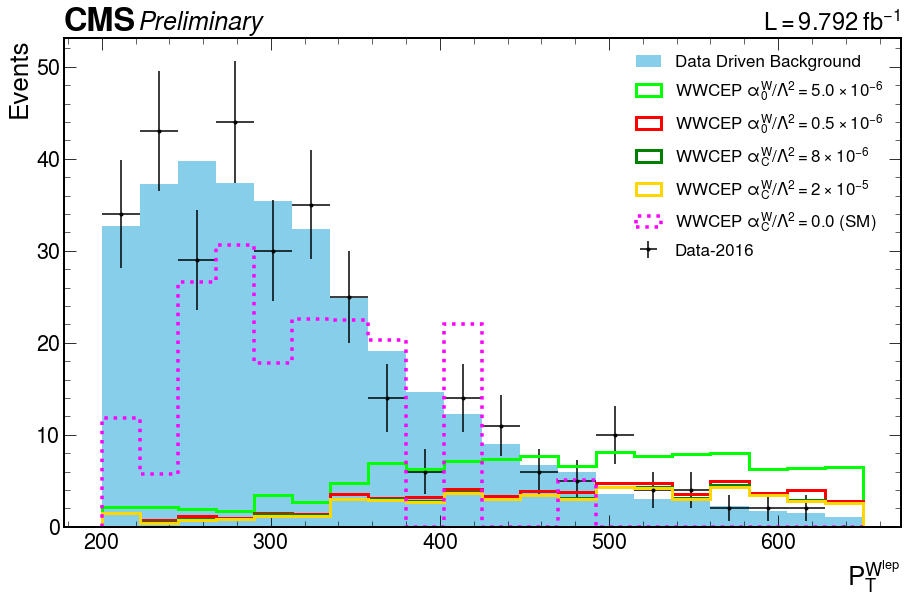

In [24]:
bins = 20
range_ = (200,650) 
plt.figure(figsize=(15,9))
var = 'Pt_W_lep'
plt.hist(DataFrame_DataDriven_Background[var] , color = 'skyblue' ,bins = bins, range = range_, weights = DataFrame_DataDriven_Background['weight'], label = 'Data Driven Background')

counts_1, bin_edges_1 = np.histogram( DataFrame_DataDriven_Background[var] , bins = bins, range = range_, weights = DataFrame_DataDriven_Background['weight'] )
errors_1 = np.sqrt( counts_1 )
bin_centres_1 = ( bin_edges_1[:-1] + bin_edges_1[1:] ) / 2.
#plt.errorbar( bin_centres_1, counts_1, yerr=errors_1, xerr=abs(bin_centres_1[4] - bin_centres_1[5])/2,  fillstyle='full', fmt='^', label = 'Data Driven Background', color = 'red' )


plt.hist( lista_events_signal(var), linewidth=3, ls = '-', histtype = 'step', color = ['gold','green','red','lime'],range = range_, bins = bins, stacked=True, label = label_signal, weights = weight_signal )
plt.hist( SM[var], linewidth=3.5, ls = ':', histtype = 'step', color = 'fuchsia', range = range_, bins = bins, stacked=True, label = r'WWCEP $\alpha_{C}^{W}/\Lambda^{2}=0.0$ (SM)', weights = SM['weight']*10000 )

counts_2, bin_edges_2 = np.histogram( DataFrame_Data[var] , bins = bins, range = range_ )
errors_2 = np.sqrt( counts_2 )
bin_centres_2 = ( bin_edges_2[:-1] + bin_edges_2[1:] ) / 2.
plt.errorbar( bin_centres_2, counts_2, yerr=errors_2, xerr=abs(bin_centres_2[4] - bin_centres_2[5])/2, fmt='.', label = 'Data-2016', color = 'black' )

#plt.hist( lista_events_back(var), stacked=True, bins = bins, range = range_, weights = [ DataFrame_multiRP_TTbar['weight'], DataFrame_multiRP_WJets['weight'], DataFrame_multiRP_QCD['weight'], DataFrame_multiRP_VV_inclusive['weight'], DataFrame_multiRP_Single_Top['weight'], DataFrame_multiRP_Drell_Yan['weight'] ] ,  linewidth=2., label = label_back , color = color )

plt.legend(loc='best', fontsize = 17)
plt.xlabel(r'$P_{T}^{W^{lep}}$')
plt.ylabel('Events')
hep.cms.label(llabel="Preliminary", rlabel="$\mathcal{L} = 9.792\;fb^{-1}$", fontsize = 25)

(exptext: Custom Text(0.0, 1, 'CMS'),
 expsuffix: Custom Text(0.0, 1.005, 'Preliminary'))

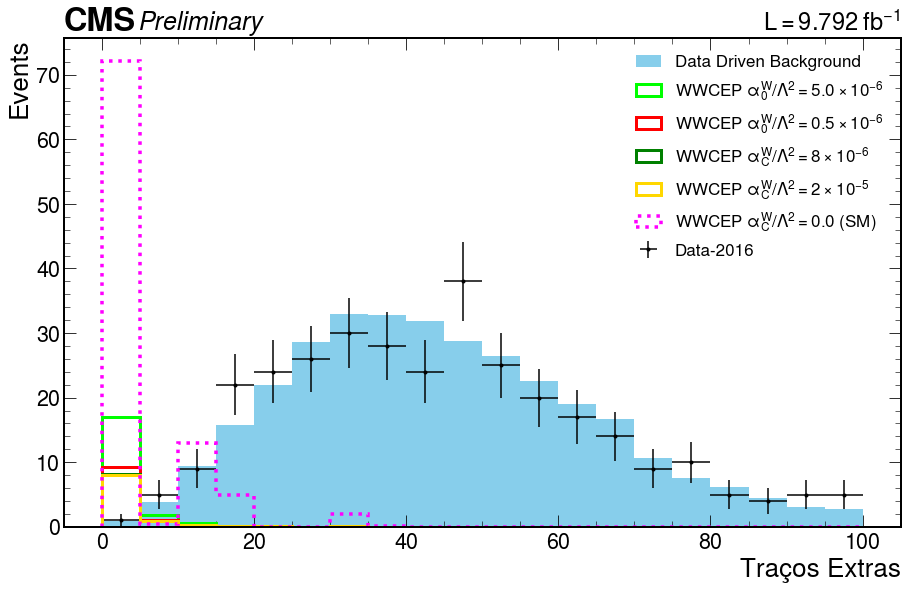

In [25]:
bins = 20
range_ = (0,100) 
plt.figure(figsize=(15,9))
var = 'ExtraTracks'
#plt.hist( DataFrame_DataDriven_Background[var], range = range_, color = 'blue', histtype = 'step' , linewidth=3, ls = '--', alpha = 1, bins = bins, weights = DataFrame_DataDriven_Background['weight'], label =  'DataDriven-Background' )

counts_1, bin_edges_1 = np.histogram( DataFrame_DataDriven_Background[var] , bins = bins, range = range_, weights = DataFrame_DataDriven_Background['weight'] )
errors_1 = np.sqrt( counts_1 )
bin_centres_1 = ( bin_edges_1[:-1] + bin_edges_1[1:] ) / 2.
#plt.errorbar( bin_centres_1, counts_1, yerr=errors_1, xerr=abs(bin_centres_1[4] - bin_centres_1[5])/2,  fillstyle='full', fmt='^', label = 'Data Driven Background', color = 'red' )

plt.hist(DataFrame_DataDriven_Background[var] , color = 'skyblue' ,bins = bins, range = range_, weights = DataFrame_DataDriven_Background['weight'], label = 'Data Driven Background')


plt.hist( lista_events_signal(var), linewidth=3, ls = '-', histtype = 'step', color = ['gold','green','red','lime'],range = range_, bins = bins, stacked=True, label = label_signal, weights = weight_signal_Extratracks )
plt.hist( SM[var], linewidth=3.5, ls = ':', histtype = 'step', color = 'fuchsia', range = range_, bins = bins, stacked=True, label = r'WWCEP $\alpha_{C}^{W}/\Lambda^{2}=0.0$ (SM)', weights = SM['weight']*5000 )

counts_2, bin_edges_2 = np.histogram( DataFrame_Data[var] , bins = bins, range = range_ )
errors_2 = np.sqrt( counts_2 )
bin_centres_2 = ( bin_edges_2[:-1] + bin_edges_2[1:] ) / 2.
plt.errorbar( bin_centres_2, counts_2, yerr=errors_2, xerr=abs(bin_centres_2[4] - bin_centres_2[5])/2, fmt='.', label = 'Data-2016', color = 'black' )

#plt.hist( lista_events_back(var), stacked=True, bins = bins, range = range_, weights = [ DataFrame_multiRP_TTbar['weight'], DataFrame_multiRP_WJets['weight'], DataFrame_multiRP_QCD['weight'], DataFrame_multiRP_VV_inclusive['weight'], DataFrame_multiRP_Single_Top['weight'], DataFrame_multiRP_Drell_Yan['weight'] ] ,  linewidth=2., label = label_back , color = color )

plt.legend(loc='best', fontsize = 17)
plt.xlabel('Traços Extras')
plt.ylabel('Events')
hep.cms.label(llabel="Preliminary", rlabel="$\mathcal{L} = 9.792\;fb^{-1}$", fontsize = 25)


(-2.2, 3.0)

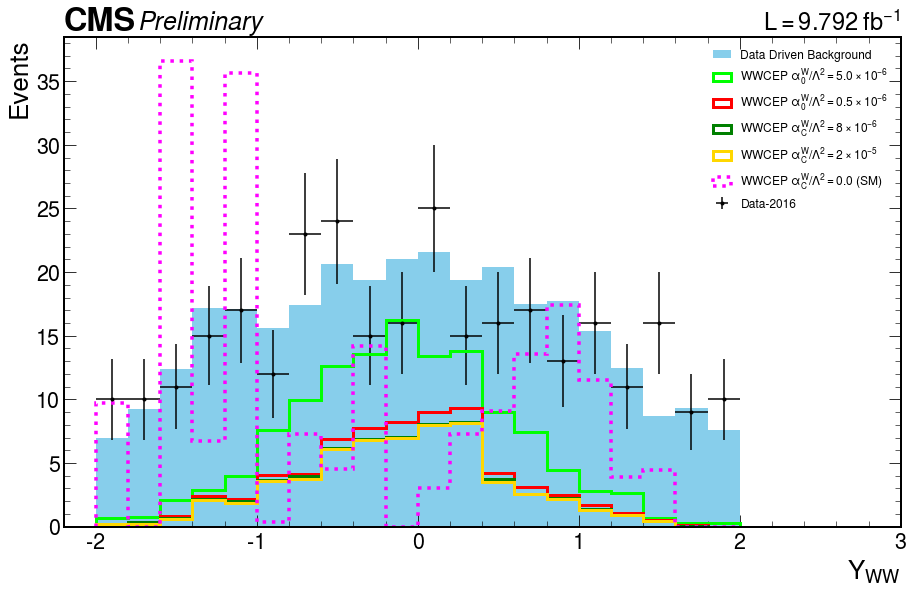

In [26]:
bins = 20
range_ = (-2,2) 
plt.figure(figsize=(15,9))
var = 'Yww'
plt.hist(DataFrame_DataDriven_Background[var] , color = 'skyblue' ,bins = bins, range = range_, weights = DataFrame_DataDriven_Background['weight'], label = 'Data Driven Background')

counts_1, bin_edges_1 = np.histogram( DataFrame_DataDriven_Background[var] , bins = bins, range = range_, weights = DataFrame_DataDriven_Background['weight'] )
errors_1 = np.sqrt( counts_1 )
bin_centres_1 = ( bin_edges_1[:-1] + bin_edges_1[1:] ) / 2.
#plt.errorbar( bin_centres_1, counts_1, yerr=errors_1, xerr=abs(bin_centres_1[4] - bin_centres_1[5])/2,  fillstyle='full', fmt='^', label = 'Data Driven Background', color = 'red' )


plt.hist( lista_events_signal(var), linewidth=3, ls = '-', histtype = 'step', color = ['gold','green','red','lime'],range = range_, bins = bins, stacked=True, label = label_signal, weights = weight_signal )
plt.hist( SM[var], linewidth=3.5, ls = ':', histtype = 'step', color = 'fuchsia', range = range_, bins = bins, stacked=True, label = r'WWCEP $\alpha_{C}^{W}/\Lambda^{2}=0.0$ (SM)', weights = SM['weight']*10000 )

counts_2, bin_edges_2 = np.histogram( DataFrame_Data[var] , bins = bins, range = range_ )
errors_2 = np.sqrt( counts_2 )
bin_centres_2 = ( bin_edges_2[:-1] + bin_edges_2[1:] ) / 2.
plt.errorbar( bin_centres_2, counts_2, yerr=errors_2, xerr=abs(bin_centres_2[4] - bin_centres_2[5])/2, fmt='.', label = 'Data-2016', color = 'black' )

#plt.hist( lista_events_back(var), stacked=True, bins = bins, range = range_, weights = [ DataFrame_multiRP_TTbar['weight'], DataFrame_multiRP_WJets['weight'], DataFrame_multiRP_QCD['weight'], DataFrame_multiRP_VV_inclusive['weight'], DataFrame_multiRP_Single_Top['weight'], DataFrame_multiRP_Drell_Yan['weight'] ] ,  linewidth=2., label = label_back , color = color )

plt.legend(loc='best', fontsize = 12)
plt.xlabel(r'$Y_{WW}$')
plt.ylabel('Events')
hep.cms.label(llabel="Preliminary", rlabel="$\mathcal{L} = 9.792\;fb^{-1}$", fontsize = 25)
plt.xlim(-2.2,3)

(exptext: Custom Text(0.0, 1, 'CMS'),
 expsuffix: Custom Text(0.0, 1.005, 'Preliminary'))

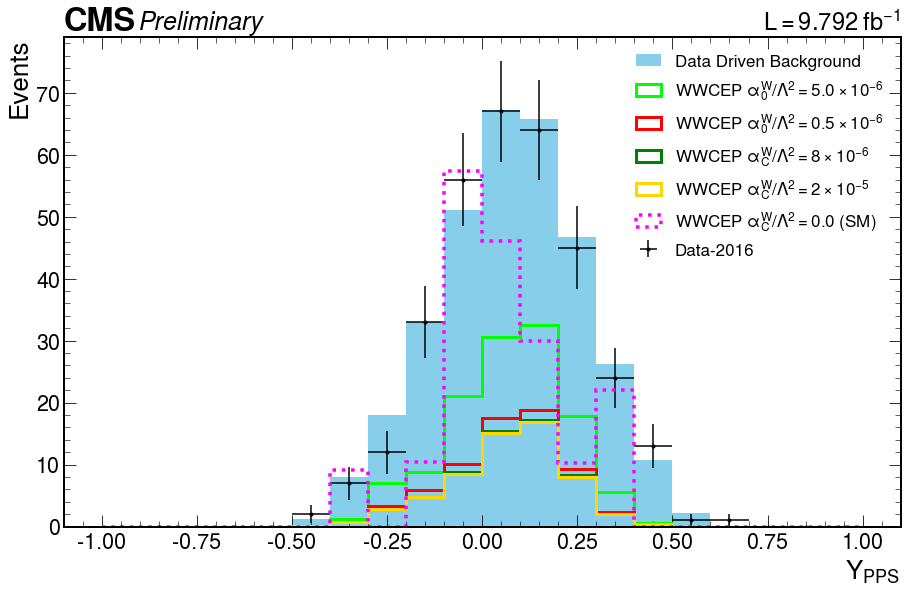

In [27]:
bins = 20
range_ = (-1,1) 
plt.figure(figsize=(15,9))
var = 'Yx'
plt.hist(DataFrame_DataDriven_Background[var] , color = 'skyblue' ,bins = bins, range = range_, weights = DataFrame_DataDriven_Background['weight'], label = 'Data Driven Background')

counts_1, bin_edges_1 = np.histogram( DataFrame_DataDriven_Background[var] , bins = bins, range = range_, weights = DataFrame_DataDriven_Background['weight'] )
errors_1 = np.sqrt( counts_1 )
bin_centres_1 = ( bin_edges_1[:-1] + bin_edges_1[1:] ) / 2.
#plt.errorbar( bin_centres_1, counts_1, yerr=errors_1, xerr=abs(bin_centres_1[4] - bin_centres_1[5])/2,  fillstyle='full', fmt='^', label = 'Data Driven Background', color = 'red' )

plt.hist( lista_events_signal(var), linewidth=3, ls = '-', histtype = 'step', color = ['gold','green','red','lime'],range = range_, bins = bins, stacked=True, label = label_signal, weights = weight_signal )
plt.hist( SM[var], linewidth=3.5, ls = ':', histtype = 'step', color = 'fuchsia', range = range_, bins = bins, stacked=True, label = r'WWCEP $\alpha_{C}^{W}/\Lambda^{2}=0.0$ (SM)', weights = SM['weight']*10000 )

counts_2, bin_edges_2 = np.histogram( DataFrame_Data[var] , bins = bins, range = range_ )
errors_2 = np.sqrt( counts_2 )
bin_centres_2 = ( bin_edges_2[:-1] + bin_edges_2[1:] ) / 2.
plt.errorbar( bin_centres_2, counts_2, yerr=errors_2, xerr=abs(bin_centres_2[4] - bin_centres_2[5])/2, fmt='.', label = 'Data-2016', color = 'black' )

#plt.hist( lista_events_back(var), stacked=True, bins = bins, range = range_, weights = [ DataFrame_multiRP_TTbar['weight'], DataFrame_multiRP_WJets['weight'], DataFrame_multiRP_QCD['weight'], DataFrame_multiRP_VV_inclusive['weight'], DataFrame_multiRP_Single_Top['weight'], DataFrame_multiRP_Drell_Yan['weight'] ] ,  linewidth=2., label = label_back , color = color )

plt.legend(loc='best', fontsize = 17)
plt.xlabel(r'$Y_{PPS}$')
plt.ylabel('Events')
hep.cms.label(llabel="Preliminary", rlabel="$\mathcal{L} = 9.792\;fb^{-1}$", fontsize = 25)


(-1.2, 1.5)

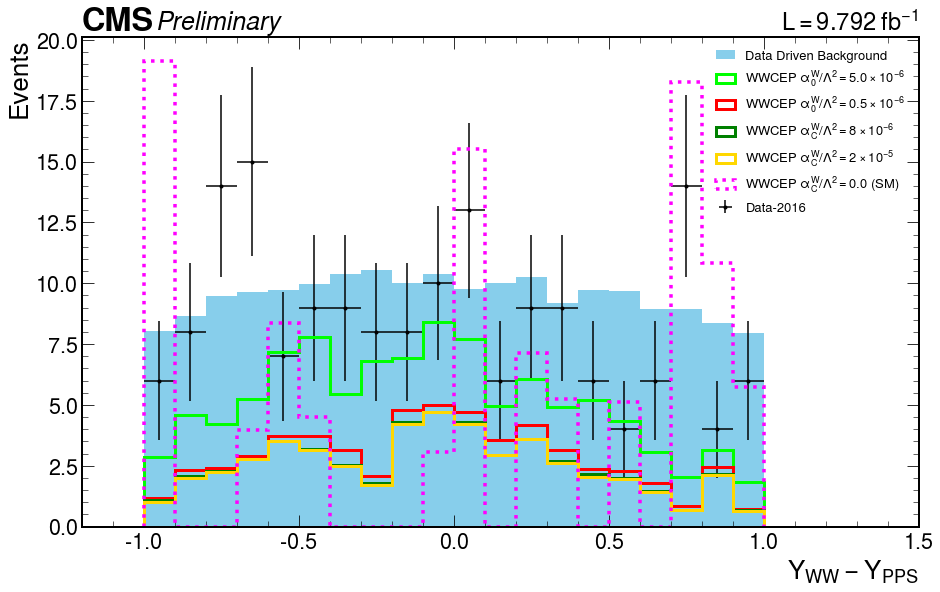

In [28]:
bins = 20
range_ = (-1,1) 
plt.figure(figsize=(15,9))
var = 'Yww_Yx'

counts_1, bin_edges_1 = np.histogram( DataFrame_DataDriven_Background[var] , bins = bins, range = range_, weights = DataFrame_DataDriven_Background['weight'] )
errors_1 = np.sqrt( counts_1 )
bin_centres_1 = ( bin_edges_1[:-1] + bin_edges_1[1:] ) / 2.
#plt.errorbar( bin_centres_1, counts_1, yerr=errors_1, xerr=abs(bin_centres_1[4] - bin_centres_1[5])/2,  fillstyle='full', fmt='^', label = 'Data Driven Background', color = 'red' )

plt.hist(DataFrame_DataDriven_Background[var] , color = 'skyblue' ,bins = bins, range = range_, weights = DataFrame_DataDriven_Background['weight'], label = 'Data Driven Background')

plt.hist( lista_events_signal(var), linewidth=3, ls = '-', histtype = 'step', color = ['gold','green','red','lime'],range = range_, bins = bins, stacked=True, label = label_signal, weights = weight_signal )
plt.hist( SM[var], linewidth=3.5, ls = ':', histtype = 'step', color = 'fuchsia', range = range_, bins = bins, stacked=True, label = r'WWCEP $\alpha_{C}^{W}/\Lambda^{2}=0.0$ (SM)', weights = SM['weight']*10000 )

counts_2, bin_edges_2 = np.histogram( DataFrame_Data[var] , bins = bins, range = range_ )
errors_2 = np.sqrt( counts_2 )
bin_centres_2 = ( bin_edges_2[:-1] + bin_edges_2[1:] ) / 2.
plt.errorbar( bin_centres_2, counts_2, yerr=errors_2, xerr=abs(bin_centres_2[4] - bin_centres_2[5])/2, fmt='.', label = 'Data-2016', color = 'black' )

#plt.hist( lista_events_back(var), stacked=True, bins = bins, range = range_, weights = [ DataFrame_multiRP_TTbar['weight'], DataFrame_multiRP_WJets['weight'], DataFrame_multiRP_QCD['weight'], DataFrame_multiRP_VV_inclusive['weight'], DataFrame_multiRP_Single_Top['weight'], DataFrame_multiRP_Drell_Yan['weight'] ] ,  linewidth=2., label = label_back , color = color )

plt.legend(loc='best', fontsize = 13)
plt.xlabel(r'$Y_{WW} - Y_{PPS}$')
plt.ylabel('Events')
hep.cms.label(llabel="Preliminary", rlabel="$\mathcal{L} = 9.792\;fb^{-1}$", fontsize = 25)
plt.xlim(-1.2,1.5)

(exptext: Custom Text(0.0, 1, 'CMS'),
 expsuffix: Custom Text(0.0, 1.005, 'Preliminary'))

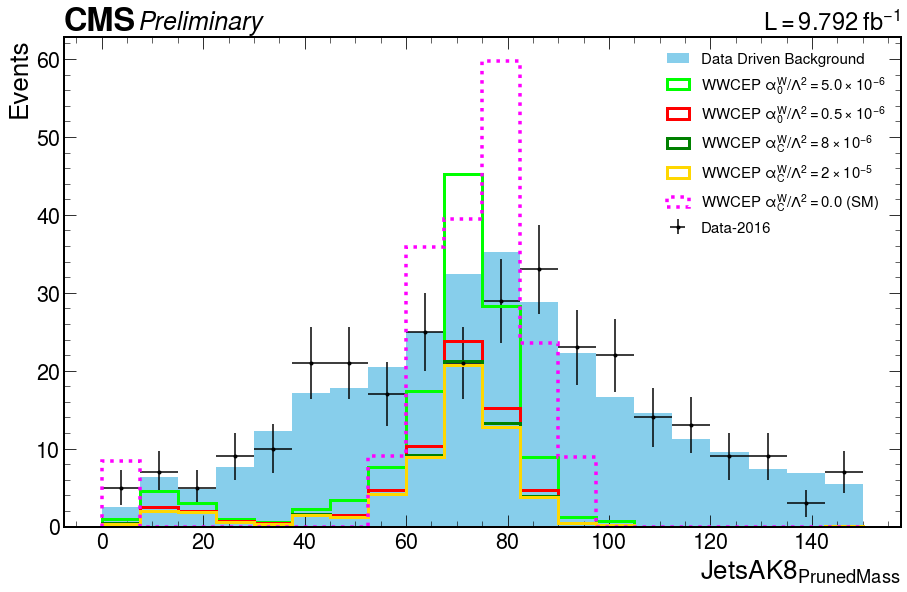

In [29]:
bins = 20
range_ = (0,150) 
plt.figure(figsize=(15,9))
var = 'jetAK8_prunedMass'
plt.hist(DataFrame_DataDriven_Background[var] , color = 'skyblue' ,bins = bins, range = range_, weights = DataFrame_DataDriven_Background['weight'], label = 'Data Driven Background')

counts_1, bin_edges_1 = np.histogram( DataFrame_DataDriven_Background[var] , bins = bins, range = range_, weights = DataFrame_DataDriven_Background['weight'] )
errors_1 = np.sqrt( counts_1 )
bin_centres_1 = ( bin_edges_1[:-1] + bin_edges_1[1:] ) / 2.
#plt.errorbar( bin_centres_1, counts_1, yerr=errors_1, xerr=abs(bin_centres_1[4] - bin_centres_1[5])/2,  fillstyle='full', fmt='^', label = 'Data Driven Background', color = 'red' )

plt.hist( lista_events_signal(var), linewidth=3, ls = '-', histtype = 'step', color = ['gold','green','red','lime'],range = range_, bins = bins, stacked=True, label = label_signal, weights = weight_signal )
plt.hist( SM[var], linewidth=3.5, ls = ':', histtype = 'step', color = 'fuchsia', range = range_, bins = bins, stacked=True, label = r'WWCEP $\alpha_{C}^{W}/\Lambda^{2}=0.0$ (SM)', weights = SM['weight']*10000 )

counts_2, bin_edges_2 = np.histogram( DataFrame_Data[var] , bins = bins, range = range_ )
errors_2 = np.sqrt( counts_2 )
bin_centres_2 = ( bin_edges_2[:-1] + bin_edges_2[1:] ) / 2.
plt.errorbar( bin_centres_2, counts_2, yerr=errors_2, xerr=abs(bin_centres_2[4] - bin_centres_2[5])/2, fmt='.', label = 'Data-2016', color = 'black' )

#plt.hist( lista_events_back(var), stacked=True, bins = bins, range = range_, weights = [ DataFrame_multiRP_TTbar['weight'], DataFrame_multiRP_WJets['weight'], DataFrame_multiRP_QCD['weight'], DataFrame_multiRP_VV_inclusive['weight'], DataFrame_multiRP_Single_Top['weight'], DataFrame_multiRP_Drell_Yan['weight'] ] ,  linewidth=2., label = label_back , color = color )

plt.legend(loc='best', fontsize = 15)
plt.xlabel(r'$JetsAK8_{PrunedMass}$')
plt.ylabel('Events')
hep.cms.label(llabel="Preliminary", rlabel="$\mathcal{L} = 9.792\;fb^{-1}$", fontsize = 25)

(exptext: Custom Text(0.0, 1, 'CMS'),
 expsuffix: Custom Text(0.0, 1.005, 'Preliminary'))

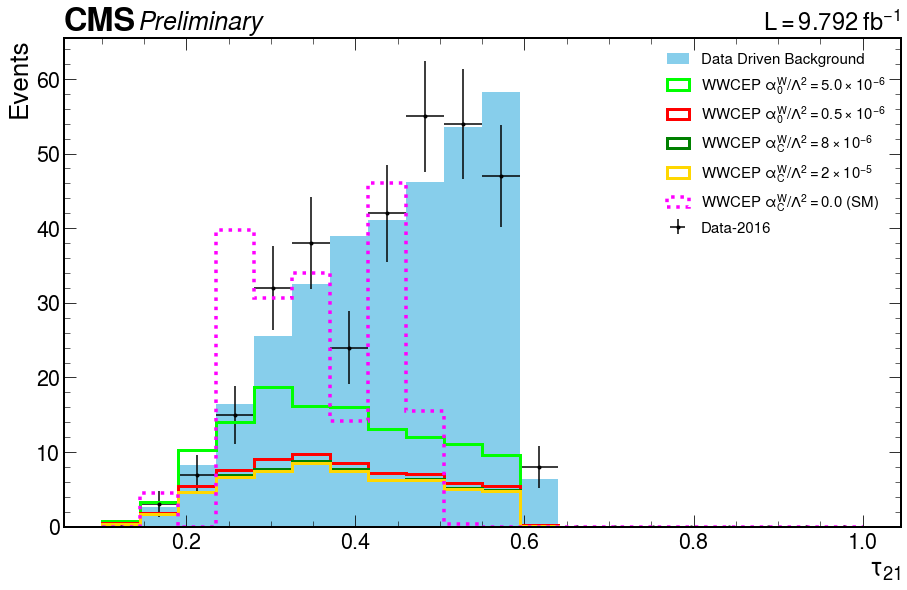

In [30]:
bins = 20
range_ = (0.1,1) 
plt.figure(figsize=(15,9))
var = 'jetAK8_tau21'
plt.hist(DataFrame_DataDriven_Background[var] , color = 'skyblue' ,bins = bins, range = range_, weights = DataFrame_DataDriven_Background['weight'], label = 'Data Driven Background')

counts_1, bin_edges_1 = np.histogram( DataFrame_DataDriven_Background[var] , bins = bins, range = range_, weights = DataFrame_DataDriven_Background['weight'] )
errors_1 = np.sqrt( counts_1 )
bin_centres_1 = ( bin_edges_1[:-1] + bin_edges_1[1:] ) / 2.
#plt.errorbar( bin_centres_1, counts_1, yerr=errors_1, xerr=abs(bin_centres_1[4] - bin_centres_1[5])/2,  fillstyle='full', fmt='^', label = 'Data Driven Background', color = 'red' )

plt.hist( lista_events_signal(var), linewidth=3, ls = '-', histtype = 'step', color = ['gold','green','red','lime'],range = range_, bins = bins, stacked=True, label = label_signal, weights = weight_signal )
plt.hist( SM[var], linewidth=3.5, ls = ':', histtype = 'step', color = 'fuchsia', range = range_, bins = bins, stacked=True, label = r'WWCEP $\alpha_{C}^{W}/\Lambda^{2}=0.0$ (SM)', weights = SM['weight']*10000 )

counts_2, bin_edges_2 = np.histogram( DataFrame_Data[var] , bins = bins, range = range_ )
errors_2 = np.sqrt( counts_2 )
bin_centres_2 = ( bin_edges_2[:-1] + bin_edges_2[1:] ) / 2.
plt.errorbar( bin_centres_2, counts_2, yerr=errors_2, xerr=abs(bin_centres_2[4] - bin_centres_2[5])/2, fmt='.', label = 'Data-2016', color = 'black' )

#plt.hist( lista_events_back(var), stacked=True, bins = bins, range = range_, weights = [ DataFrame_multiRP_TTbar['weight'], DataFrame_multiRP_WJets['weight'], DataFrame_multiRP_QCD['weight'], DataFrame_multiRP_VV_inclusive['weight'], DataFrame_multiRP_Single_Top['weight'], DataFrame_multiRP_Drell_Yan['weight'] ] ,  linewidth=2., label = label_back , color = color )

plt.legend(loc='best', fontsize = 15)
plt.xlabel(r'$\tau_{21}$')
plt.ylabel('Events')
hep.cms.label(llabel="Preliminary", rlabel="$\mathcal{L} = 9.792\;fb^{-1}$", fontsize = 25)


(exptext: Custom Text(0.0, 1, 'CMS'),
 expsuffix: Custom Text(0.0, 1.005, 'Preliminary'))

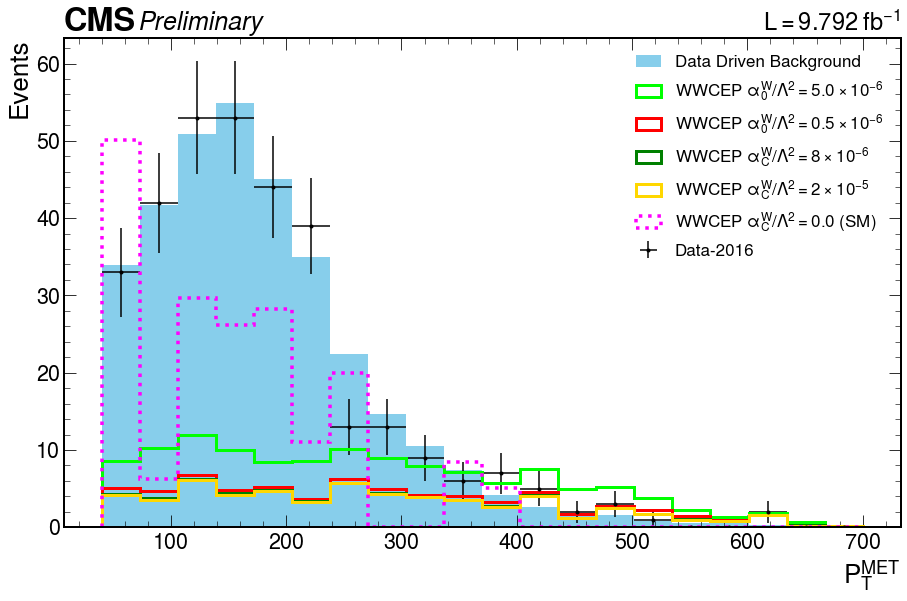

In [31]:
bins = 20
range_ = (40,700) 
plt.figure(figsize=(15,9))
var = 'METPt'
plt.hist(DataFrame_DataDriven_Background[var] , color = 'skyblue' ,bins = bins, range = range_, weights = DataFrame_DataDriven_Background['weight'], label = 'Data Driven Background')

counts_1, bin_edges_1 = np.histogram( DataFrame_DataDriven_Background[var] , bins = bins, range = range_, weights = DataFrame_DataDriven_Background['weight'] )
errors_1 = np.sqrt( counts_1 )
bin_centres_1 = ( bin_edges_1[:-1] + bin_edges_1[1:] ) / 2.
#plt.errorbar( bin_centres_1, counts_1, yerr=errors_1, xerr=abs(bin_centres_1[4] - bin_centres_1[5])/2,  fillstyle='full', fmt='^', label = 'Data Driven Background', color = 'red' )

plt.hist( lista_events_signal(var), linewidth=3, ls = '-', histtype = 'step', color = ['gold','green','red','lime'],range = range_, bins = bins, stacked=True, label = label_signal, weights = weight_signal )
plt.hist( SM[var], linewidth=3.5, ls = ':', histtype = 'step', color = 'fuchsia', range = range_, bins = bins, stacked=True, label = r'WWCEP $\alpha_{C}^{W}/\Lambda^{2}=0.0$ (SM)', weights = SM['weight']*10000 )

counts_2, bin_edges_2 = np.histogram( DataFrame_Data[var] , bins = bins, range = range_ )
errors_2 = np.sqrt( counts_2 )
bin_centres_2 = ( bin_edges_2[:-1] + bin_edges_2[1:] ) / 2.
plt.errorbar( bin_centres_2, counts_2, yerr=errors_2, xerr=abs(bin_centres_2[4] - bin_centres_2[5])/2, fmt='.', label = 'Data-2016', color = 'black' )

#plt.hist( lista_events_back(var), stacked=True, bins = bins, range = range_, weights = [ DataFrame_multiRP_TTbar['weight'], DataFrame_multiRP_WJets['weight'], DataFrame_multiRP_QCD['weight'], DataFrame_multiRP_VV_inclusive['weight'], DataFrame_multiRP_Single_Top['weight'], DataFrame_multiRP_Drell_Yan['weight'] ] ,  linewidth=2., label = label_back , color = color )

plt.legend(loc='best', fontsize = 17)
plt.xlabel(r'$P_{T}^{MET}$')
plt.ylabel('Events')
hep.cms.label(llabel="Preliminary", rlabel="$\mathcal{L} = 9.792\;fb^{-1}$", fontsize = 25)


(exptext: Custom Text(0.0, 1, 'CMS'),
 expsuffix: Custom Text(0.0, 1.005, 'Preliminary'))

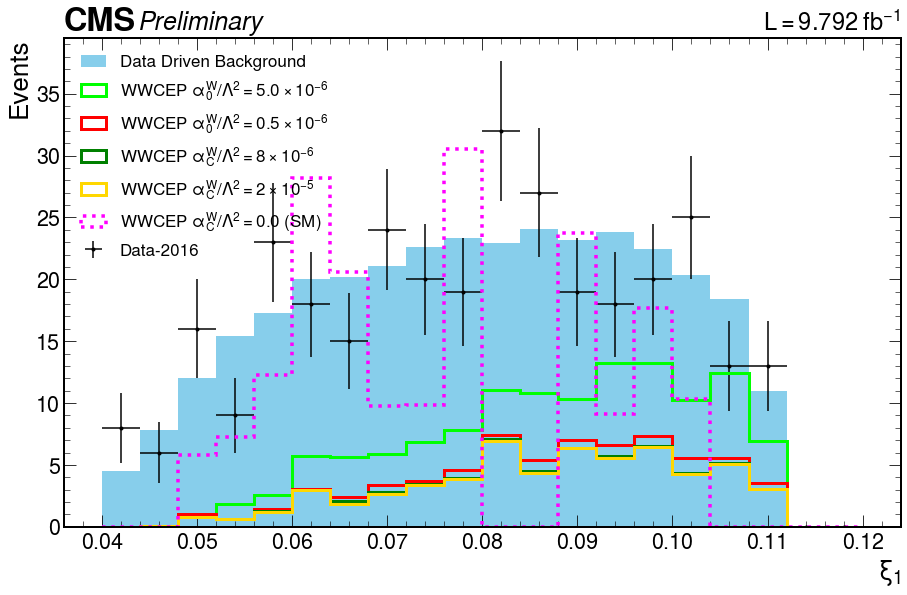

In [32]:
bins = 20
range_ = (0.04,0.12) 
plt.figure(figsize=(15,9))
var = 'xi1'
plt.hist(DataFrame_DataDriven_Background[var] , color = 'skyblue' ,bins = bins, range = range_, weights = DataFrame_DataDriven_Background['weight'], label = 'Data Driven Background')

counts_1, bin_edges_1 = np.histogram( DataFrame_DataDriven_Background[var] , bins = bins, range = range_, weights = DataFrame_DataDriven_Background['weight'])
errors_1 = np.sqrt( counts_1 )
bin_centres_1 = ( bin_edges_1[:-1] + bin_edges_1[1:] ) / 2.
#plt.errorbar( bin_centres_1, counts_1, yerr=errors_1, xerr=abs(bin_centres_1[4] - bin_centres_1[5])/2,  fillstyle='full', fmt='^', label = 'Data Driven Background', color = 'red' )

plt.hist( lista_events_signal(var), linewidth=3, ls = '-', histtype = 'step', color = ['gold','green','red','lime'],range = range_, bins = bins, stacked=True, label = label_signal, weights = weight_signal )
plt.hist( SM[var], linewidth=3.5, ls = ':', histtype = 'step', color = 'fuchsia', range = range_, bins = bins, stacked=True, label = r'WWCEP $\alpha_{C}^{W}/\Lambda^{2}=0.0$ (SM)', weights = SM['weight']*10000 )

counts_2, bin_edges_2 = np.histogram( DataFrame_Data[var] , bins = bins, range = range_ )
errors_2 = np.sqrt( counts_2 )
bin_centres_2 = ( bin_edges_2[:-1] + bin_edges_2[1:] ) / 2.
plt.errorbar( bin_centres_2, counts_2, yerr=errors_2, xerr=abs(bin_centres_2[4] - bin_centres_2[5])/2, fmt='.', label = 'Data-2016', color = 'black' )

#plt.hist( lista_events_back(var), stacked=True, bins = bins, range = range_, weights = [ DataFrame_multiRP_TTbar['weight'], DataFrame_multiRP_WJets['weight'], DataFrame_multiRP_QCD['weight'], DataFrame_multiRP_VV_inclusive['weight'], DataFrame_multiRP_Single_Top['weight'], DataFrame_multiRP_Drell_Yan['weight'] ] ,  linewidth=2., label = label_back , color = color )

plt.legend(loc='best', fontsize = 17)
plt.xlabel(r'$\xi_{1}$')
plt.ylabel('Events')
hep.cms.label(llabel="Preliminary", rlabel="$\mathcal{L} = 9.792\;fb^{-1}$", fontsize = 25)


(exptext: Custom Text(0.0, 1, 'CMS'),
 expsuffix: Custom Text(0.0, 1.005, 'Preliminary'))

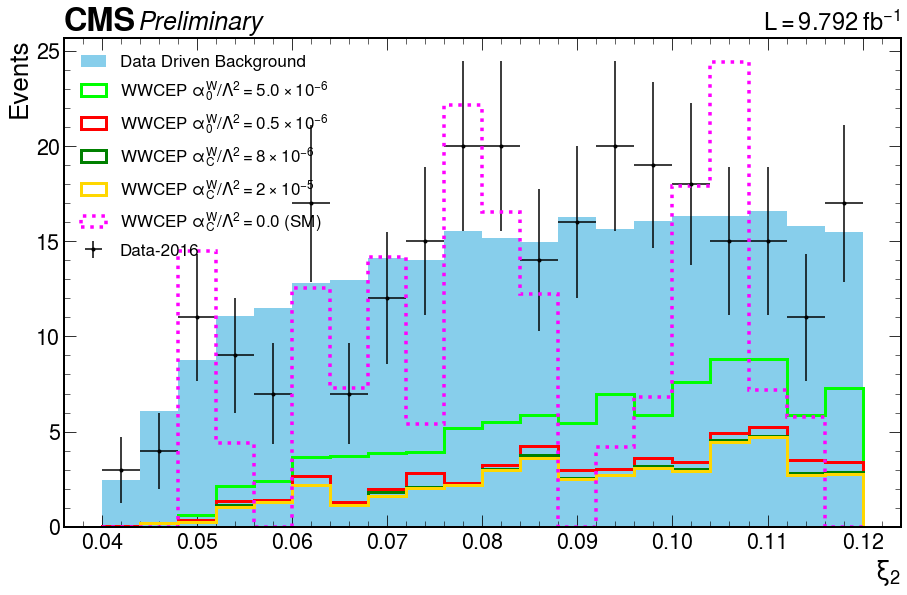

In [33]:
bins = 20
range_ = (0.04,0.12) 
plt.figure(figsize=(15,9))
var = 'xi2'
plt.hist(DataFrame_DataDriven_Background[var] , color = 'skyblue' ,bins = bins, range = range_, weights = DataFrame_DataDriven_Background['weight'], label = 'Data Driven Background')

counts_1, bin_edges_1 = np.histogram( DataFrame_DataDriven_Background[var] , bins = bins, range = range_, weights = DataFrame_DataDriven_Background['weight'] )
errors_1 = np.sqrt( counts_1 )
bin_centres_1 = ( bin_edges_1[:-1] + bin_edges_1[1:] ) / 2.
#plt.errorbar( bin_centres_1, counts_1, yerr=errors_1, xerr=abs(bin_centres_1[4] - bin_centres_1[5])/2,  fillstyle='full', fmt='^', label = 'Data Driven Background', color = 'red' )

plt.hist( lista_events_signal(var), linewidth=3, ls = '-', histtype = 'step', color = ['gold','green','red','lime'],range = range_, bins = bins, stacked=True, label = label_signal, weights = weight_signal )
plt.hist( SM[var], linewidth=3.5, ls = ':', histtype = 'step', color = 'fuchsia', range = range_, bins = bins, stacked=True, label = r'WWCEP $\alpha_{C}^{W}/\Lambda^{2}=0.0$ (SM)', weights = SM['weight']*10000 )

counts_2, bin_edges_2 = np.histogram( DataFrame_Data[var] , bins = bins, range = range_ )
errors_2 = np.sqrt( counts_2 )
bin_centres_2 = ( bin_edges_2[:-1] + bin_edges_2[1:] ) / 2.
plt.errorbar( bin_centres_2, counts_2, yerr=errors_2, xerr=abs(bin_centres_2[4] - bin_centres_2[5])/2, fmt='.', label = 'Data-2016', color = 'black' )

#plt.hist( lista_events_back(var), stacked=True, bins = bins, range = range_, weights = [ DataFrame_multiRP_TTbar['weight'], DataFrame_multiRP_WJets['weight'], DataFrame_multiRP_QCD['weight'], DataFrame_multiRP_VV_inclusive['weight'], DataFrame_multiRP_Single_Top['weight'], DataFrame_multiRP_Drell_Yan['weight'] ] ,  linewidth=2., label = label_back , color = color )

plt.legend(loc='best', fontsize = 17)
plt.xlabel(r'$\xi_{2}$')
plt.ylabel('Events')
hep.cms.label(llabel="Preliminary", rlabel="$\mathcal{L} = 9.792\;fb^{-1}$", fontsize = 25)
